<a href="https://colab.research.google.com/github/rachanashinde15/py/blob/master/ResnetCiphar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models,Sequential
from tensorflow.keras.optimizers import Adam

from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
import numpy as np

In [82]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [83]:
X_test.shape

(10000, 32, 32, 3)

In [84]:
y_train.shape


(50000, 1)

In [85]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [86]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [87]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [88]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [89]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [90]:
def identity_block(X, f, filters):
   
    
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [91]:
def convolutional_block(X, f, filters,s=2):
   
    
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [92]:
def ResNet50(input_shape=(32, 32, 3),classes = 10):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(32, (7, 7), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], s=1)
    X = identity_block(X, 3, [64, 64, 256])
    X = identity_block(X, 3, [64, 64, 256])
    


    X = convolutional_block(X, f=3, filters=[128, 128, 512], s=2)
    X = identity_block(X, 3, [128, 128, 512])
    X = identity_block(X, 3, [128, 128, 512])
    

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], s=2)
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    X = identity_block(X, 3, [256, 256, 1024])
    

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], s=2)
    X = identity_block(X, 3, [512, 512, 2048])
    
   

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    X = Flatten()(X)
    X = Dense(classes, activation='softmax',name='fc' +str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [93]:
model = ResNet50(input_shape = (32,32,3),classes=10)


In [94]:
learning_rate = tf.keras.optimizers.Adam(learning_rate=0.01)

In [95]:
h = model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
#historyList = []
#for i in range(5):
#h = model.fit(X_train, y_train, validation_data = (X_test,y_test),batch_size=64,epochs=50)
#historyList.append(h)


In [97]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [98]:
h = model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d_3 (ZeroPadding2  (None, 38, 38, 3)   0           ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_255 (Conv2D)            (None, 16, 16, 32)   4736        ['zero_padding2d_3[0][0]']       
                                                                                                  
 batch_normalization_255 (Batch  (None, 16, 16, 32)  128         ['conv2d_255[0][0]']      

In [99]:
h = model.fit(X_train, y_train, validation_data = (X_test,y_test),batch_size=32,epochs=50, callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 60s 35ms/step - loss: 2.1319 - accuracy: 0.3239 - val_loss: 2.5293 - val_accuracy: 0.2124
Epoch 2/50
1563/1563 [==============================] - 55s 35ms/step - loss: 2.1997 - accuracy: 0.2940 - val_loss: 1.9750 - val_accuracy: 0.3021
Epoch 3/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.9834 - accuracy: 0.3416 - val_loss: 1.7035 - val_accuracy: 0.3805
Epoch 4/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.9079 - accuracy: 0.3655 - val_loss: 3.2900 - val_accuracy: 0.2653
Epoch 5/50
1563/1563 [==============================] - 54s 35ms/step - loss: 1.8219 - accuracy: 0.3835 - val_loss: 1.5764 - val_accuracy: 0.4228
Epoch 6/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.6512 - accuracy: 0.4186 - val_loss: 3.8287 - val_accuracy: 0.3953
Epoch 7/50
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5530 - accuracy: 0.4559 - val_loss: 2.3077 -

In [100]:
print(h.history.keys())
h.history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


{'loss': [2.131887197494507,
  2.1997482776641846,
  1.9834352731704712,
  1.90789794921875,
  1.8219268321990967,
  1.651206612586975,
  1.5529958009719849,
  1.482944369316101,
  1.3132507801055908,
  1.1842752695083618,
  1.0826704502105713,
  0.9661882519721985,
  0.9332500100135803,
  0.8286525011062622,
  0.7385528087615967,
  0.6925458312034607,
  0.6398199796676636,
  0.5542300343513489,
  0.5185856819152832,
  0.48436346650123596,
  0.4033762216567993],
 'accuracy': [0.32387998700141907,
  0.2939999997615814,
  0.34163999557495117,
  0.3654800057411194,
  0.38345998525619507,
  0.4185999929904938,
  0.4558599889278412,
  0.4774399995803833,
  0.5339000225067139,
  0.5806999802589417,
  0.6200000047683716,
  0.6624000072479248,
  0.677299976348877,
  0.7065799832344055,
  0.743619978427887,
  0.7584400177001953,
  0.7771599888801575,
  0.8049399852752686,
  0.8185799717903137,
  0.8298199772834778,
  0.8575800061225891],
 'val_loss': [2.5292603969573975,
  1.974989891052246,
  

Text(0, 0.5, 'Training loss')

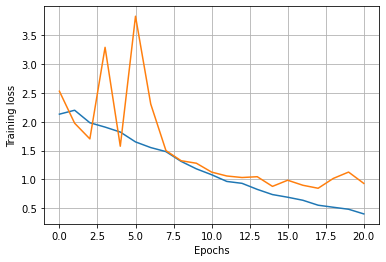

In [101]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training loss')

Text(0, 0.5, 'Training Accuracy')

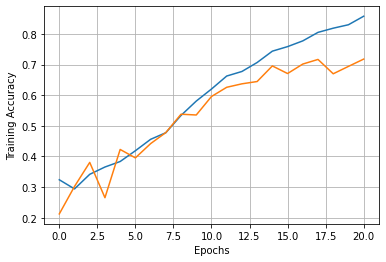

In [102]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

In [103]:
scores = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9321 - accuracy: 0.7177


In [104]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

313/313 [==============================] - 4s 10ms/step
[[863  12  21  23   2   2   9   5  47  16]
 [ 35 820   8  14   0   6  20   2  26  69]
 [ 96   5 600 107  44  66  36  27  11   8]
 [ 33  11  42 661  28 123  61  25   9   7]
 [ 39   4  90 133 493  57 106  67   9   2]
 [ 16   5  26 248  19 607  29  44   4   2]
 [ 12   3  48  95   4  19 811   2   4   2]
 [ 26   9  26  56  34  78   9 744   3  15]
 [ 76  36  12  15   1   6   7   4 826  17]
 [ 57  83  12  31   0   3  28  10  24 752]]


In [105]:
ipredsLabel = model.predict(X_test)
#classes_p = np.argmax(ipredsLabel,axis=1)
#ipredsLabel[:5]



313/313 [==============================] - 3s 10ms/step


Text(33.0, 0.5, 'Truth')

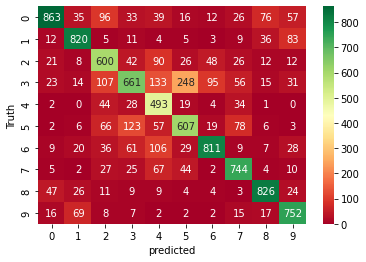

In [106]:
import seaborn as sn
confus_matrix = tf.math.confusion_matrix(labels=y_pred,predictions=y_test)

sn.heatmap(confus_matrix, annot=True, cmap='RdYlGn', fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')